# détecter les attaques pour tous les types d'attaque  

# import data

In [99]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
test_logs = pd.read_csv("./data/test.csv")

# ajouter nouveau feature
### ajouter des features longueur, des symboles spécials et des mots spécials pour des logs

In [98]:
import re
from sklearn.feature_extraction.text import CountVectorizer
# obtenir la longueur de lien(information)
def get_len(info_comp):
    return len(info_comp)

# obtenir des symboles spécials pour logs sql
def get_sql_char(info_comp):
    return len(re.findall("[?=\*#@%>]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs sql
def get_sql_word(info_comp):
    return len(re.findall("(SELECT)|(version)|(comment)|(user)|(FROM)|(mysql)|(host)|(DELET)|(name)|(MYSQL)|(WHERE)|(password)|(ORDER)",info_comp,re.IGNORECASE))

# obtenir des symboles spécials pour logs xss
def get_xss_char(info_comp):
    return len(re.findall("[<>\"\'=&{}!#\*]", info_comp, re.IGNORECASE))

# obtenir des mots spécials pour logs xss
def get_xss_word(info_comp):
    return len(re.findall("(alert)|(script)|(XSS)|(SRC=)|(xss)|(onerror)|(onload)|(BODY)|(src=)|(INPUT)|(http)|(LINK)|(url=)|(SCRIPT)",info_comp,re.IGNORECASE))

def get_password_number(info_comp):
    return len(re.findall("((?:0(?=1)|1(?=2)|2(?=3)|3(?=4)|4(?=5)|5(?=6)|6(?=7)|7(?=8)|8(?=9)|9(?=0)){2}\d)|((\d)\1{2})",info_comp,re.IGNORECASE))

def get_feature(info_comp):
    return [get_len(info_comp),get_evil_char(info_comp),get_evil_word(info_comp)]


In [100]:
f=lambda x: str(x)
test_logs['len']=test_logs['password'].apply(f).apply(get_len)
test_logs['sqlchar']=test_logs['password'].apply(f).apply(get_sql_char)
test_logs['sqlword']=test_logs['password'].apply(f).apply(get_sql_word)
test_logs['xsschar']=test_logs['password'].apply(f).apply(get_xss_char)
test_logs['xssword']=test_logs['password'].apply(f).apply(get_xss_word)
test_logs['passnumber']=test_logs['password'].apply(f).apply(get_password_number)
test_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,zone,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,0,189.188.154.208,07/Jul/2017,12,10,0,200,GET,frank,frank,200,24478,800,0,5,0,0,0,0,0
1,1,189.183.172.77,07/Jul/2017,12,15,0,200,GET,bob,123456789,200,3243,1431,1,9,0,0,0,0,3
2,2,128.55.162.143,07/Jul/2017,12,20,0,200,GET,alice,alice,200,28222,802,0,5,0,0,0,0,0
3,3,128.147.11.33,07/Jul/2017,12,25,0,200,GET,ted,ted,200,16281,803,0,3,0,0,0,0,0
4,4,128.168.150.134,07/Jul/2017,12,30,0,200,GET,dimi,dimi,200,20261,804,0,4,0,0,0,0,0
5,5,128.197.5.208,07/Jul/2017,12,35,0,200,GET,ced,ced,200,15091,805,0,3,0,0,0,0,0
6,6,128.116.9.34,07/Jul/2017,12,40,0,200,GET,phil,phil,200,5739,806,0,4,0,0,0,0,0
7,7,128.25.191.113,07/Jul/2017,12,45,0,200,GET,julien,julien,200,25258,807,0,6,0,0,0,0,0
8,8,128.232.46.176,07/Jul/2017,12,50,0,200,GET,jerome,jerome,200,23962,808,0,6,0,0,0,0,0
9,9,189.36.191.19,07/Jul/2017,12,55,0,200,GET,hacker,hacker,200,23095,809,0,6,0,0,0,0,0


# transformer la forme de l'adresse ip

In [101]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_logs['ip_address'] = le.fit_transform(test_logs['ip_address'].apply(f))
test_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,zone,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,0,88643,07/Jul/2017,12,10,0,200,GET,frank,frank,200,24478,800,0,5,0,0,0,0,0
1,1,88200,07/Jul/2017,12,15,0,200,GET,bob,123456789,200,3243,1431,1,9,0,0,0,0,3
2,2,64556,07/Jul/2017,12,20,0,200,GET,alice,alice,200,28222,802,0,5,0,0,0,0,0
3,3,16722,07/Jul/2017,12,25,0,200,GET,ted,ted,200,16281,803,0,3,0,0,0,0,0
4,4,23870,07/Jul/2017,12,30,0,200,GET,dimi,dimi,200,20261,804,0,4,0,0,0,0,0
5,5,33985,07/Jul/2017,12,35,0,200,GET,ced,ced,200,15091,805,0,3,0,0,0,0,0
6,6,6542,07/Jul/2017,12,40,0,200,GET,phil,phil,200,5739,806,0,4,0,0,0,0,0
7,7,52515,07/Jul/2017,12,45,0,200,GET,julien,julien,200,25258,807,0,6,0,0,0,0,0
8,8,46723,07/Jul/2017,12,50,0,200,GET,jerome,jerome,200,23962,808,0,6,0,0,0,0,0
9,9,96526,07/Jul/2017,12,55,0,200,GET,hacker,hacker,200,23095,809,0,6,0,0,0,0,0


In [102]:
del test_logs[test_logs.columns[0]]

# arrange feature
### remplacer des données null au 0

In [103]:
def replace(resp):
    if resp == '-':
        resp=0
    elif (resp==resp)==False:
        resp=0
    return (resp)
test_logs['respsize']=test_logs['respsize'].apply(replace)
test_logs['timed']=test_logs['timed'].apply(replace)
test_logs['status']=test_logs['status'].apply(replace)

# la visualisation de la performance

In [104]:
from sklearn import metrics
def do_metrics(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))
    print ("metrics.precision_score:")
    print (metrics.precision_score(y_test, y_pred))
    print ("metrics.recall_score:")
    print (metrics.recall_score(y_test, y_pred))
    print ("metrics.f1_score:")
    print (metrics.f1_score(y_test,y_pred))

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='Greens')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
def plot_roc(model,y_test,y_pred):
    # Compute ROC curve and ROC area for each class  
    fpr,tpr,threshold = roc_curve(y_test, y_pred) ###True positive和false positive  
    roc_auc = auc(fpr,tpr) ###auc 

    plt.figure()  
    lw = 2  
    plt.figure(figsize=(5,5))  
    plt.plot(fpr, tpr, color='darkorange',  
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
    plt.xlim([0.0, 1.0])  
    plt.ylim([0.0, 1.05])  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
    plt.title('Receiver operating characteristic example')  
    plt.legend(loc="lower right")  
    plt.show()  

# utiliser des features

In [116]:
features = list(test_logs.columns[[0,2,3,4,9,10,11,13,14,15,16,17,18]])
X = test_logs[features]
X

,ip_address,hour,minute,seconds,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,passnumber
0,88643,12,10,0,200,24478,800,5,0,0,0,0,0
1,88200,12,15,0,200,3243,1431,9,0,0,0,0,3
2,64556,12,20,0,200,28222,802,5,0,0,0,0,0
3,16722,12,25,0,200,16281,803,3,0,0,0,0,0
4,23870,12,30,0,200,20261,804,4,0,0,0,0,0
5,33985,12,35,0,200,15091,805,3,0,0,0,0,0
6,6542,12,40,0,200,5739,806,4,0,0,0,0,0
7,52515,12,45,0,200,25258,807,6,0,0,0,0,0
8,46723,12,50,0,200,23962,808,6,0,0,0,0,0
9,96526,12,55,0,200,23095,809,6,0,0,0,0,0


In [117]:
def transint(x):
    x=int(x)
    return(x)
X['status']=X['status'].apply(transint)
X['respsize']=X['respsize'].apply(transint)
X['timed']=X['timed'].apply(transint)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

# tirer des labels "1" pour logs d'attaque, "0" pour logs de non attaque

In [118]:
y=test_logs['label']
y

0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        1
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        1
29        0
         ..
102959    1
102960    0
102961    0
102962    0
102963    0
102964    0
102965    0
102966    0
102967    0
102968    1
102969    0
102970    0
102971    0
102972    0
102973    0
102974    0
102975    0
102976    0
102977    1
102978    0
102979    0
102980    0
102981    0
102982    0
102983    0
102984    0
102985    0
102986    1
102987    0
102988    0
Name: label, dtype: int64

# split train set(0.7) et test set(0.3) 

In [119]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

In [120]:
list_ip_train=np.array(X_train['ip_address']).tolist()
def count_ip_train(x):
    ipcount=list_ip_train.count(x)
    return(ipcount)
X_train['ipcount']=X_train['ip_address'].apply(count_ip_train)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [121]:
list_ip_test=np.array(X_test['ip_address']).tolist()
def count_ip_test(x):
    ipcount=list_ip_test.count(x)
    return(ipcount)
X_test['ipcount']=X_test['ip_address'].apply(count_ip_test)

C:\Users\18791\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [122]:
X_train

,ip_address,hour,minute,seconds,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,passnumber,ipcount
24825,94715,21,40,0,200,28220,736,6,0,0,0,0,0,1
79636,54454,19,40,0,200,9650,711,4,0,0,0,0,0,1
82534,64813,21,10,0,200,11441,604,3,0,0,0,0,0,1
63111,8225,14,50,0,200,26152,881,4,0,0,0,0,0,1
84313,101264,1,25,0,200,1609,580,3,0,0,0,0,0,1
53083,101068,18,15,0,200,27785,903,8,0,0,0,0,0,1
31756,90348,0,15,0,200,25697,772,8,0,0,0,0,0,1
74724,38412,10,20,0,200,2946,467,5,0,0,0,0,0,1
16765,48835,22,0,0,200,27383,489,6,0,0,0,0,0,1
18088,4309,12,15,0,200,12505,610,4,0,0,0,0,0,1


In [123]:
X_test

,ip_address,hour,minute,seconds,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword,passnumber,ipcount
18143,50467,16,50,0,200,18225,665,6,0,0,0,0,0,1
40749,41357,2,0,0,200,10185,426,3,0,0,0,0,0,1
57608,65274,11,20,0,200,22646,579,3,0,0,0,0,0,1
99024,70400,20,5,0,200,25470,760,3,0,0,0,0,0,1
40544,7619,8,55,0,200,18711,822,5,0,0,0,0,0,1
100911,40108,9,20,0,200,28066,844,3,0,0,0,0,0,1
34847,63095,20,55,0,200,24343,817,4,0,0,0,0,0,1
39399,37237,16,15,0,200,25005,561,6,0,0,0,0,0,1
29745,37717,0,40,0,200,20742,848,5,0,0,0,0,0,1
89975,23665,18,45,0,200,10148,304,5,0,0,0,0,0,1


# Choisir des features

In [124]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf_f = ExtraTreesClassifier()
clf_f = clf_f.fit(X_train, y_train)
clf_f.feature_importances_

array([  2.16326562e-01,   7.09303865e-03,   8.36357203e-02,
         0.00000000e+00,   0.00000000e+00,   7.62640167e-03,
         2.44837465e-01,   2.67263759e-01,   0.00000000e+00,
         2.02109022e-02,   0.00000000e+00,   0.00000000e+00,
         1.52919924e-01,   8.62279625e-05])

In [125]:
model = SelectFromModel(clf_f, prefit=True)
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [126]:
X_train_new 

array([[94715,    40,   736,     6,     0],
       [54454,    40,   711,     4,     0],
       [64813,    10,   604,     3,     0],
       ..., 
       [36730,    20,   487,     4,     0],
       [15367,    50,   840,     6,     0],
       [70910,    35,   629,     5,     0]], dtype=int64)

In [127]:
X_test_new

array([[50467,    50,   665,     6,     0],
       [41357,     0,   426,     3,     0],
       [65274,    20,   579,     3,     0],
       ..., 
       [90102,    45,   608,     8,     0],
       [82962,    45,  1294,     7,     2],
       [49048,     5,   447,     6,     0]], dtype=int64)

metrics.confusion_matrix:
[[27441     0]
 [    1  3455]]
metrics.accuracy_score:
0.999967634398
metrics.precision_score:
1.0
metrics.recall_score:
0.999710648148
metrics.f1_score:
0.99985530314
Confusion Matrix Stats
no attaque/no attaque: 100.00% (27441/27441)
no attaque/attaque: 0.00% (0/27441)
attaque/no attaque: 0.03% (1/3456)
attaque/attaque: 99.97% (3455/3456)


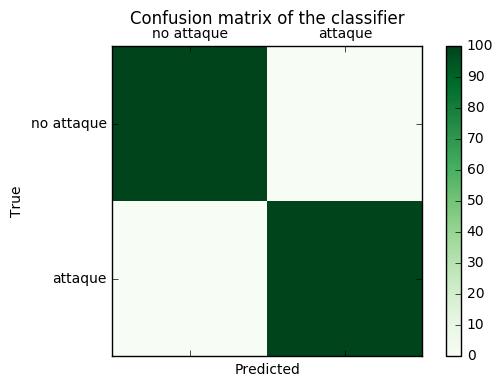

In [154]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf = RandomForestClassifier(n_estimators= 170, max_depth=15, min_samples_split=2,
                                  min_samples_leaf=1)
# training
clf_rf = clf_rf.fit(X_train_new, y_train)
# classification
y_pred = clf_rf.predict(X_test_new)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)